# 1 answer

The mathematical formula for a linear Support Vector Machine (SVM) is based on the concept of finding a hyperplane that best separates two classes in a linearly separable dataset. The hyperplane is represented by a linear equation. In the case of a two-dimensional feature space (two features), the linear SVM's equation is:

f(x)=w.x+b


Here's what each term represents:

f(x): This is the decision function or the prediction made by the SVM for input data .x. It's used to classify new data points.


w: This is the weight vector, which is perpendicular to the hyperplane and determines its orientation. The goal is to find the optimal w that maximizes the margin between the two classes while minimizing the classification error.


x: This is the input feature vector. In a two-dimensional feature space,
x typically contains two components representing the features of the data point.

b: This is the bias term or the intercept of the hyperplane. It's used to shift the hyperplane away from the origin to better separate the data points. It is also known as the threshold.

The classification decision is made based on the sign of f(x).if f(x) > 0,the datapoint x is classified as one class(eg ,+1) and if f(x)<0, it's classified as the other class (e.g., -1).

# 2 answer

The objective function of a linear Support Vector Machine (SVM) aims to maximize the margin between two classes while minimizing the classification error. It can be formulated as a constrained optimization problem.

In Python, you can use libraries like scikit-learn to work with SVMs, and the objective function is handled by the SVM's underlying optimization solver. Here's how you can set up and solve the SVM optimization problem using scikit-learn:

In [ ]:
from sklearn import svm

# Create a linear SVM classifier
clf = svm.SVC(kernel='linear')

# Fit the classifier to your training data
clf.fit(X_train, y_train)


# 3 answer

The kernel trick in Support Vector Machines (SVM) is a mathematical technique that allows SVMs to handle non-linearly separable data by implicitly mapping the original feature space into a higher-dimensional space where the data becomes linearly separable. This is achieved without explicitly computing the transformation of each data point. Instead, the kernel trick directly computes the dot product between data points in this higher-dimensional space.

In other words, the kernel trick enables SVMs to find non-linear decision boundaries in a computationally efficient way by working in a higher-dimensional feature space without explicitly transforming the data into that space.

Here are some key points about the kernel trick in SVM:

1. Non-Linearity: In many real-world problems, the data is not linearly separable in the original feature space. The kernel trick allows SVMs to capture complex, non-linear relationships between data points.

2. Kernel Functions: SVMs use kernel functions to implicitly map the data into a higher-dimensional space. The choice of kernel function depends on the problem and the nature of non-linearity you want to capture. Common kernel functions include:

Linear Kernel: Suitable for linearly separable data.
Polynomial Kernel: Captures polynomial relationships.
Radial Basis Function (RBF) Kernel (Gaussian Kernel): Useful for capturing complex non-linear patterns.
Sigmoid Kernel: Used for problems with sigmoid-shaped decision boundaries.
3. Mathematical Formulation: In the SVM's optimization problem, the kernel trick appears as dot products between transformed feature vectors. The dot products are replaced by kernel functions. For example, the dot product

K is the chosen kernel function.

4. Computational Efficiency: The kernel trick is computationally efficient because it avoids explicitly mapping data points to a higher-dimensional space, which can be computationally expensive or even infeasible in high-dimensional spaces.

5. Kernel Parameters: Some kernel functions have hyperparameters (e.g., the degree of a polynomial kernel or the width of an RBF kernel). These parameters may need to be tuned for optimal model performance.

6. Overfitting: While the kernel trick can make SVMs highly flexible, it can also lead to overfitting if not used carefully. Regularization (adjusting the cost parameter

C in SVM) can help control overfitting.

# 4 answer

Support vectors are crucial elements in a Support Vector Machine (SVM) algorithm. They are the data points from the training dataset that lie closest to the decision boundary (the hyperplane) that separates different classes. Support vectors play a significant role in defining the decision boundary and determining the margin, and they give SVM its name.

Here's an explanation of the role of support vectors in SVM with a Python example using scikit-learn:

Role of Support Vectors:

1. Defining the Decision Boundary: Support vectors are the data points that are closest to the decision boundary (hyperplane) that separates the classes. The decision boundary is determined by the support vectors because they influence the position and orientation of the hyperplane.

2. Margin Calculation: The margin is the distance between the decision boundary and the nearest support vector. Maximizing this margin is the central objective of SVM. The larger the margin, the better the model generalizes to new, unseen data.

3. Model Robustness: Support vectors are the most critical data points for the model. They are the points that are challenging to classify correctly, as they are located near the decision boundary. Focusing on these challenging points helps SVM build a robust model that can generalize well to unseen data.

ValueError: ignored

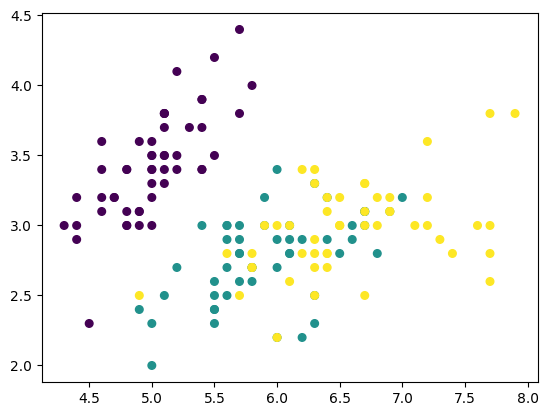

In [2]:
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, :2]  # We use only the first two features for visualization purposes
y = iris.target

clf = svm.SVC(kernel='linear')

clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title('Support Vectors and Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# 6 answer

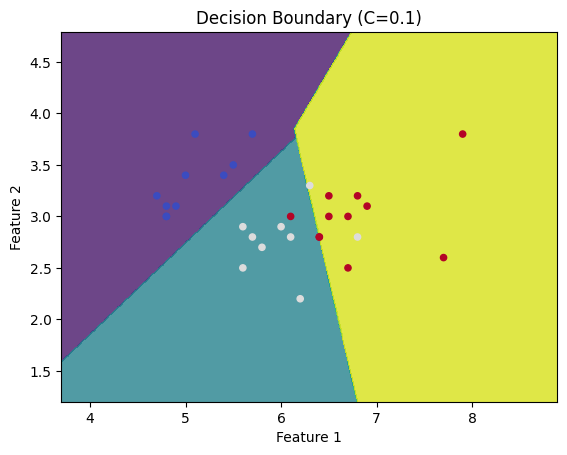

Accuracy (C=0.1): 83.33%


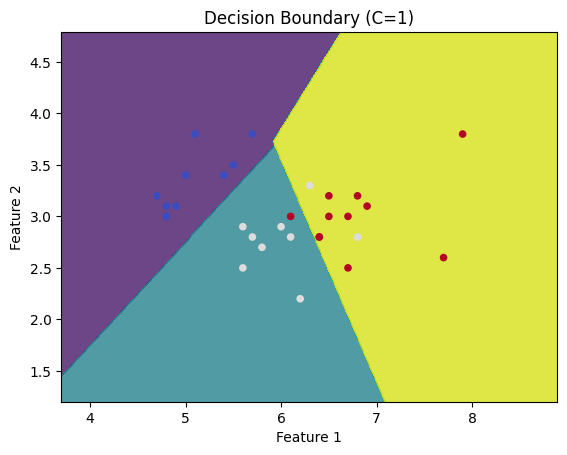

Accuracy (C=1): 90.00%


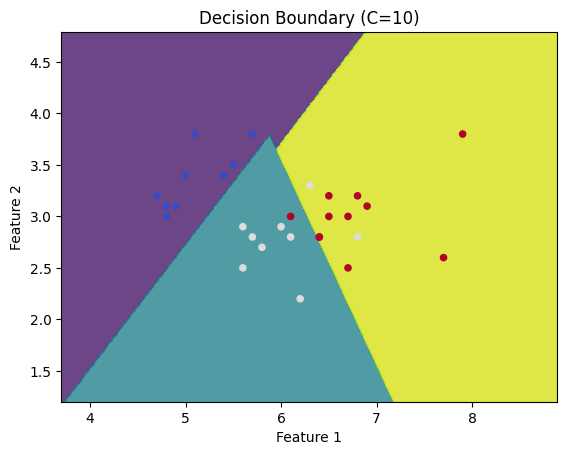

Accuracy (C=10): 90.00%


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target

# Split the data into a training set and a testing set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear SVM classifier
def train_linear_svm(C):
    clf = SVC(kernel='linear', C=C, random_state=42)
    clf.fit(X_train, y_train)
    return clf

# Predict labels on the test set and compute accuracy
def evaluate_accuracy(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Plot decision boundaries using two features
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary (C={})'.format(clf.C))

# Try different values of the regularization parameter C and evaluate performance
C_values = [0.1, 1, 10]

for C in C_values:
    clf = train_linear_svm(C)
    accuracy = evaluate_accuracy(clf, X_test, y_test)

    plt.figure()
    plot_decision_boundary(clf, X_test, y_test)
    plt.show()

    print("Accuracy (C={}): {:.2f}%".format(C, accuracy * 100))


In [4]:
class LinearSVM:
    def __init__(self, learning_rate=0.01, num_epochs=1000, C=1.0):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.C = C

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_epochs):
            for i, x_i in enumerate(X):
                condition = y[i] * (np.dot(x_i, self.weights) - self.bias) >= 1
                if not condition:
                    self.weights -= self.learning_rate * (self.weights - self.C * y[i] * x_i)
                    self.bias -= self.learning_rate * self.C * y[i]

    def predict(self, X):
        return np.sign(np.dot(X, self.weights) - self.bias)

# Create and train the Linear SVM from scratch
clf_scratch = LinearSVM(C=1.0)
clf_scratch.fit(X_train, y_train)

# Make predictions on the test data
y_pred_scratch = clf_scratch.predict(X_test)

# Calculate accuracy for the scratch implementation
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print("Accuracy (scratch):", accuracy_scratch)


Accuracy (scratch): 0.3
